<a href="https://colab.research.google.com/github/andrevcmelo/BootcampAlura2021/blob/main/BootcampAlura_Modulo03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link Dicionário dos Dados: https://github.com/andrevcmelo/BootcampAlura2021/blob/main/bases_modulo3/Dicionario_PENSE_Microdados_Amostra1.xls

Link Base de Dados: https://drive.google.com/file/d/15PqTHhjgvG3KCCx27U2iEmhnhuL8oGa3/view?usp=sharing

#### Importação de Bibliotecas

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime

plt.style.use('ggplot')

#### Importação de Dados

In [159]:
#base de dados da Amostra 2
url = 'https://raw.githubusercontent.com/andrevcmelo/BootcampAlura2021/main/bases_modulo3/PENSE_AMOSTRA2_ALUNOESCOLA.CSV'

df = pd.read_csv(url, sep=';',thousands=".", decimal=",")

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 296 entries, ANOPESQ to turma
dtypes: float64(10), int64(286)
memory usage: 37.4 MB


In [161]:
df.head(5)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,5,1,296


In [162]:
#Dicionários para auxiliar nas análises
regiao = {
    1: 'Norte',
    2: 'Nordeste',
    3: 'Sudeste',
    4: 'Sul',
    5: 'Centro-Oeste'
}
sexo = {
    1: 'Masculino',
    2: 'Feminino'
}
raca = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    99: 'Não informado'
}
turno = {
    1: 'Manhã',
    2: 'Intermediário',
    3: 'Tarde',
    4: 'Noite',
    5: 'Integral',
    99: 'Não informado'
}
serie = {
    1: '6º ano Ensino Fundamental',
    2: '7º ano Ensino Fundamental',
    3: '8º ano Ensino Fundamental',
    4: '9º ano Ensino Fundamental',
    5: '1º ano Ensino Médio',
    6: '2º ano Ensino Médio',
    7: '3º ano Ensino Médio',
    99: 'Não informado'
}
situacao_escola = {
    1: 'Urbana',
    2: 'Rural'
}
tipo_escola = {
    1: 'Pública',
    2: 'Privada'
}
satisfacao = {
    1: 'Muito satisfeito(a)',
    2: 'Satisfeito(a)',
    3: 'Indiferente',
    4: 'Insatisfeito(a)',
    5: 'Muito insatisfeito(a)',
    99: 'Não informado'
}

In [163]:
#Criando colunas "traduzidas" de acordo com o Dicionário de dados e inserindo em um novo DataFrame para facilitar as análises
dados = pd.DataFrame()
dados['Regiao'] = df['REGEOGR'].map(regiao)
dados['Sexo'] = df['VB01001'].map(sexo)
dados['Raça'] = df['VB01002'].map(raca)
dados['Idade'] = df['VB01003']
dados['Serie'] = df['VB01021'].map(serie)
dados['Turno'] = df['VB01022'].map(turno)
dados['DeslocDiario'] = df['TEMPODESLOC']
dados['SituacaoEscola'] = df['V0006'].map(situacao_escola)
dados['TipoEscola'] = df['V0007'].map(tipo_escola)
dados['Altura'] = round(df['VB17004']/100,2)
dados['Peso'] = round(df['VB17003'],2)
dados['IMC'] = round(dados['Peso'] / dados['Altura']**2,2)
dados['Satisfacao_Corpo'] = df['VB11007'].map(satisfacao)

classes_IMC = [0, 18, 25, 30, 60]
rotulos_IMC = ['Desnutrido', 'Normal', 'Sobrepeso', 'Obesidade']
dados['Classe_IMC'] = pd.cut(x = dados['IMC'], bins = classes_IMC, labels = rotulos_IMC, include_lowest=True)
#K = número de intervalos de categoria para auxiliar em análises
k = int(1 + ((10/3) * np.log10(len(dados))))
dados['Classe_Altura'] = pd.cut(x = dados['Altura'], bins = k, include_lowest=True)
dados['Classe_Peso'] = pd.cut(x = dados['Peso'], bins = k, include_lowest=True)

dados.head(5)

,Regiao,Sexo,Raça,Idade,Serie,Turno,DeslocDiario,SituacaoEscola,TipoEscola,Altura,Peso,IMC,Satisfacao_Corpo,Classe_IMC,Classe_Altura,Classe_Peso
0,Norte,Feminino,Branca,13,9º ano Ensino Fundamental,Manhã,0.0,Urbana,Privada,1.57,37.1,15.05,Satisfeito(a),Desnutrido,"(1.524, 1.571]","(34.94, 46.32]"
1,Norte,Feminino,Branca,14,9º ano Ensino Fundamental,Manhã,120.0,Urbana,Privada,1.52,50.2,21.73,Satisfeito(a),Normal,"(1.477, 1.524]","(46.32, 57.7]"
2,Norte,Masculino,Parda,13,9º ano Ensino Fundamental,Manhã,0.0,Urbana,Privada,1.61,48.2,18.59,Satisfeito(a),Normal,"(1.571, 1.619]","(46.32, 57.7]"
3,Norte,Masculino,Branca,14,9º ano Ensino Fundamental,Manhã,0.0,Urbana,Privada,1.72,69.4,23.46,Satisfeito(a),Normal,"(1.713, 1.761]","(69.08, 80.46]"
4,Norte,Masculino,Branca,13,9º ano Ensino Fundamental,Manhã,30.0,Urbana,Privada,1.68,78.9,27.95,Insatisfeito(a),Sobrepeso,"(1.666, 1.713]","(69.08, 80.46]"


In [164]:
def tabela_frequencia_categoria(data, col):
  frequencia = round(data[col].value_counts(normalize = True) * 100,2)
  distribuicao = data[col].value_counts()
  tabela = pd.DataFrame({'Distribuicao': distribuicao, 'Frequencia (%)': frequencia})
  tabela.rename_axis('Atributos', axis = 1, inplace = True)
  return tabela

In [165]:
tabela_frequencia_categoria(dados,'Raça')

Atributos,Distribuicao,Frequencia (%)
Parda,6726,40.63
Branca,6575,39.71
Preta,1939,11.71
Amarela,712,4.30
Indígena,581,3.51
Não informado,23,0.14


In [166]:
tabela_frequencia_categoria(dados,'Sexo')

Atributos,Distribuicao,Frequencia (%)
Masculino,8287,50.05
Feminino,8269,49.95


In [167]:
tabela_frequencia_categoria(dados,'Serie')

Atributos,Distribuicao,Frequencia (%)
7º ano Ensino Fundamental,3042,18.37
8º ano Ensino Fundamental,2604,15.73
6º ano Ensino Fundamental,2583,15.60
2º ano Ensino Médio,2438,14.73
1º ano Ensino Médio,2383,14.39
9º ano Ensino Fundamental,1761,10.64
3º ano Ensino Médio,1736,10.49
Não informado,9,0.05


In [168]:
tabela_frequencia_categoria(dados,'Classe_IMC')

Atributos,Distribuicao,Frequencia (%)
Normal,10101,61.01
Desnutrido,4069,24.58
Sobrepeso,1751,10.58
Obesidade,635,3.84


In [169]:
tabela_frequencia_categoria(dados,'Classe_Altura')

Atributos,Distribuicao,Frequencia (%)
"(1.619, 1.666]",2881,17.40
"(1.524, 1.571]",2776,16.77
"(1.571, 1.619]",2638,15.93
"(1.666, 1.713]",2098,12.67
"(1.477, 1.524]",1905,11.51
"(1.713, 1.761]",1531,9.25
"(1.429, 1.477]",950,5.74
"(1.761, 1.808]",655,3.96
"(1.382, 1.429]",406,2.45
"(1.808, 1.855]",334,2.02


In [170]:
tabela_frequencia_categoria(dados,'Classe_Peso')

Atributos,Distribuicao,Frequencia (%)
"(46.32, 57.7]",5754,34.75
"(34.94, 46.32]",3852,23.27
"(57.7, 69.08]",3724,22.49
"(69.08, 80.46]",1425,8.61
"(23.56, 34.94]",927,5.60
"(80.46, 91.84]",544,3.29
"(91.84, 103.22]",202,1.22
"(103.22, 114.6]",77,0.47
"(114.6, 125.98]",20,0.12
"(125.98, 137.36]",15,0.09


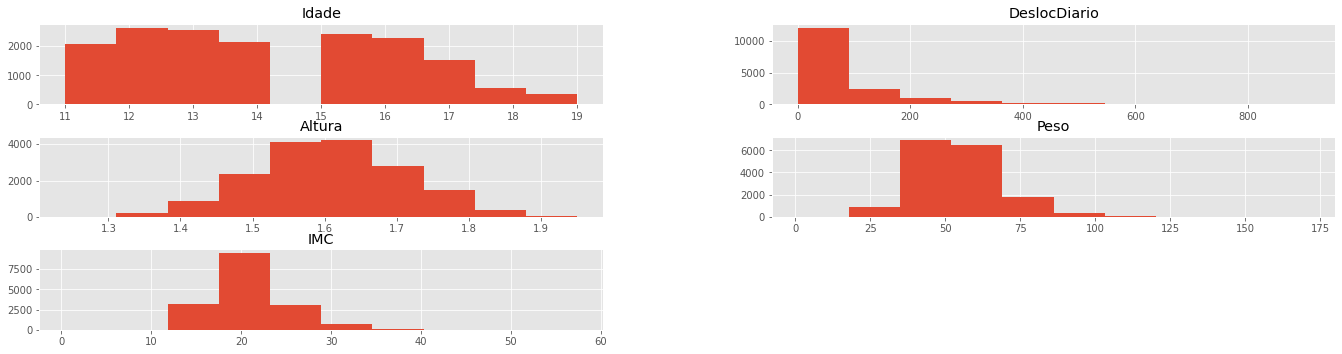

In [171]:
dados.hist(bins = 10, figsize=(20,5))
plt.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
plt.show()

In [172]:
#Classe de IMC por tipo de escola - Quantidade
TipoEscola_ClasseIMC = pd.crosstab(dados['TipoEscola'], dados['Classe_IMC'])
TipoEscola_ClasseIMC

Classe_IMC,Desnutrido,Normal,Sobrepeso,Obesidade
TipoEscola,,,,
Privada,910,2609,502,154
Pública,3159,7492,1249,481


In [173]:
#Satisfação com o próprio corpo (meninos x meninas) - Quantidade
Satiscacao_Corpo = pd.crosstab(dados['Satisfacao_Corpo'], dados['Sexo'])
Satiscacao_Corpo

Sexo,Feminino,Masculino
Satisfacao_Corpo,,
Indiferente,857,950
Insatisfeito(a),1540,786
Muito insatisfeito(a),454,260
Muito satisfeito(a),1926,2682
Não informado,62,119
Satisfeito(a),3430,3490


In [174]:
#Satisfação com o próprio corpo (meninos x meninas) - Porcentagem Geral
Satiscacao_Corpo_porcGeral = pd.crosstab(dados['Satisfacao_Corpo'], dados['Sexo'], normalize = True) * 100
Satiscacao_Corpo_porcGeral

Sexo,Feminino,Masculino
Satisfacao_Corpo,,
Indiferente,5.176371,5.738101
Insatisfeito(a),9.301764,4.747524
Muito insatisfeito(a),2.742208,1.570428
Muito satisfeito(a),11.633245,16.199565
Não informado,0.374487,0.718773
Satisfeito(a),20.717565,21.079971


In [175]:
#Satisfação com o próprio corpo (meninos x meninas) - Porcentagem por Gênero
Satiscacao_Corpo_porcGenero = pd.crosstab(dados['Satisfacao_Corpo'], dados['Sexo'], normalize = 'columns') * 100
Satiscacao_Corpo_porcGenero

Sexo,Feminino,Masculino
Satisfacao_Corpo,,
Indiferente,10.364010,11.463738
Insatisfeito(a),18.623776,9.484735
Muito insatisfeito(a),5.490386,3.137444
Muito satisfeito(a),23.291813,32.363944
Não informado,0.749788,1.435984
Satisfeito(a),41.480227,42.114155


In [176]:
#Satisfação com o próprio corpo (meninos x meninas) - Porcentagem por Gênero e Satisfação
Satiscacao_Corpo_porcGeneroSatisfacao = pd.crosstab(dados['Satisfacao_Corpo'], dados['Sexo'], normalize = 'index') * 100
Satiscacao_Corpo_porcGeneroSatisfacao

Sexo,Feminino,Masculino
Satisfacao_Corpo,,
Indiferente,47.426674,52.573326
Insatisfeito(a),66.208083,33.791917
Muito insatisfeito(a),63.585434,36.414566
Muito satisfeito(a),41.796875,58.203125
Não informado,34.254144,65.745856
Satisfeito(a),49.566474,50.433526


In [191]:
#IMC médio das Categorias de Estudantes que por Satisfação com seu corpo
Satiscacao_Corpo_porcGeneroSatisfacao2 = pd.crosstab(index = dados['Satisfacao_Corpo'], 
                                                     columns = dados['Sexo'], aggfunc=np.mean, values = dados['IMC'] ).round(1)
Satiscacao_Corpo_porcGeneroSatisfacao2

Sexo,Feminino,Masculino
Satisfacao_Corpo,,
Indiferente,21.9,21.9
Insatisfeito(a),22.7,23.0
Muito insatisfeito(a),23.5,22.5
Muito satisfeito(a),19.9,19.9
Não informado,20.8,20.5
Satisfeito(a),20.6,20.7
